
Last name: Nassar

Date: 06/12/2020

Approach: Three steps are conducted; data preprocessing, model selection and testing, and finally predictions 
          on the test.csv file. The steps involved in each step is listed below:
          
          A) Data preprocessing: 1) Encoding. 
                                 2) Imputation. 
                                 3) Scaling. 
                                 4) Checking for balance in the training dataset.
                                 
          B) Model selection: 1) Train two classifications models; logistic regression and Support Vector Classifier.
                              2) Models tuning using cross validation (not my favirote tuning technique 
                                 but just for the purpose of a quick submission as long as AUC is larger than 0.825).
                              3) Model selection based on the AUC criteria. SVC is chosen.
                              
          C) Final predictions: Model is finally implemented to predict the outcome in the test.csv file.
          

Estimated AUC: 0.8478


In [1]:
import numpy                 as np 
import pandas                as pd 
import matplotlib.pyplot     as plt
import seaborn               as sns
import warnings
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.impute          import KNNImputer
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import roc_curve
from sklearn.model_selection import cross_val_predict
warnings.filterwarnings("ignore")

In [2]:
# read the data and create a dataframe
train_data   = pd.read_csv('C:\\Jobs_Applications\\BlueOwl\\train.csv')
test_data    = pd.read_csv('C:\\Jobs_Applications\\BlueOwl\\test.csv')
df_train_raw = pd.DataFrame(data=train_data)
df_test_raw  = pd.DataFrame(data=test_data)

----------------

***Initial Data Exploration***

In [3]:
# data size
df_train_raw.shape 

(10000, 10)

In [4]:
df_test_raw.shape

(10000, 9)

In [5]:
df_train_raw.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [6]:
df_test_raw.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [7]:
df_train_raw[df_train_raw['in_initial_launch_location'] == 1]

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
5,18,0.004757,other,F,1,41700,1,3,1,0
7,45,0.005152,Android,F,1,62496,2,1,10,0
12,24,0.004836,desktop,F,1,51666,1,1,1,0
13,40,0.004080,laptop,M,1,40752,2,3,8,0
14,23,0.003684,desktop,M,1,33365,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...
9988,32,0.005272,other,F,1,44506,1,3,7,0
9989,25,0.005139,laptop,F,1,41816,2,3,4,0
9991,40,0.005185,desktop,F,1,58278,2,3,5,0
9992,38,0.005889,iPhone,F,1,66657,1,3,3,0


In [8]:
df_test_raw[df_test_raw['in_initial_launch_location'] == 0]

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
5,51,0.006242,iPhone,F,0,60520,1,1,14
6,20,0.003534,desktop,M,0,59324,1,1,0
7,35,0.004568,Android,F,0,37002,2,3,5
...,...,...,...,...,...,...,...,...,...
9989,18,0.003447,desktop,M,0,30561,2,3,1
9990,25,0.003770,desktop,M,0,32475,1,2,2
9992,46,0.005330,other,F,0,68844,2,2,13
9993,47,0.005289,other,F,0,73142,1,1,0


In [9]:
# Dtypes and Non-Nulls
df_train_raw.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  int64  
 1   cost_of_ad                  10000 non-null  float64
 2   device_type                 10000 non-null  object 
 3   gender                      9731 non-null   object 
 4   in_initial_launch_location  10000 non-null  int64  
 5   income                      10000 non-null  int64  
 6   n_drivers                   10000 non-null  int64  
 7   n_vehicles                  10000 non-null  int64  
 8   prior_ins_tenure            10000 non-null  int64  
 9   outcome                     10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


In [10]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  int64  
 1   cost_of_ad                  10000 non-null  float64
 2   device_type                 10000 non-null  object 
 3   gender                      9751 non-null   object 
 4   in_initial_launch_location  10000 non-null  int64  
 5   income                      10000 non-null  int64  
 6   n_drivers                   10000 non-null  int64  
 7   n_vehicles                  10000 non-null  int64  
 8   prior_ins_tenure            10000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 703.2+ KB


In [11]:
# descriptive statistics
df_train_raw.describe(include='all')  

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
count,10000.000000,10000.000000,10000,9731,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000
unique,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,desktop,F,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2032,4970,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.991800,0.004666,NaN,NaN,0.497500,58004.335800,1.497000,2.00220,5.406800,0.0982
std,13.038203,0.000838,NaN,NaN,0.500019,17330.778355,0.500016,0.81784,5.046014,0.2976
min,16.000000,0.003171,NaN,NaN,0.000000,16241.000000,1.000000,1.00000,0.000000,0.0000
25%,27.000000,0.003995,NaN,NaN,0.000000,45533.500000,1.000000,1.00000,1.000000,0.0000
50%,38.000000,0.004625,NaN,NaN,0.000000,58053.500000,1.000000,2.00000,4.000000,0.0000
75%,49.000000,0.005164,NaN,NaN,1.000000,70235.250000,2.000000,3.00000,8.000000,0.0000


In [12]:
df_test_raw.describe(include='all')  

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
count,10000.000000,10000.000000,10000,9751,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,F,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2072,4906,NaN,NaN,NaN,NaN,NaN
mean,38.029200,0.004668,NaN,NaN,0.500900,58232.104800,1.486300,2.009100,5.319800
std,12.896921,0.000836,NaN,NaN,0.500024,17318.192722,0.499837,0.817242,5.019487
min,16.000000,0.003173,NaN,NaN,0.000000,16124.000000,1.000000,1.000000,0.000000
25%,27.000000,0.004000,NaN,NaN,0.000000,45575.250000,1.000000,1.000000,1.000000
50%,38.000000,0.004609,NaN,NaN,1.000000,58271.000000,1.000000,2.000000,4.000000
75%,49.000000,0.005175,NaN,NaN,1.000000,70438.750000,2.000000,3.000000,8.000000


In [13]:
# checking the null values
df_train_raw.isnull().sum() 

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [14]:
df_test_raw.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

In [15]:
df_train_raw.loc[df_train_raw.isnull().sum(axis=1) > 0].head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
15,32,0.003519,Android,NaN,0,71909,1,3,8,0
38,54,0.005529,iPhone,NaN,0,87122,2,3,8,0
91,35,0.005510,iPhone,NaN,0,52343,1,3,3,0
113,41,0.004282,Android,NaN,0,72978,2,2,11,0
122,34,0.005518,iPhone,NaN,0,50425,2,3,3,0


In [16]:
# percentage of missing values
(df_train_raw.isnull().sum(axis=0)/df_train_raw.shape[0])*100

age                           0.00
cost_of_ad                    0.00
device_type                   0.00
gender                        2.69
in_initial_launch_location    0.00
income                        0.00
n_drivers                     0.00
n_vehicles                    0.00
prior_ins_tenure              0.00
outcome                       0.00
dtype: float64

In [17]:
(df_test_raw.isnull().sum(axis=0)/df_test_raw.shape[0])*100

age                           0.00
cost_of_ad                    0.00
device_type                   0.00
gender                        2.49
in_initial_launch_location    0.00
income                        0.00
n_drivers                     0.00
n_vehicles                    0.00
prior_ins_tenure              0.00
dtype: float64

In [18]:
# check if there is any duplicated observations.

In [19]:
df_train_raw.loc[df_train_raw.duplicated(keep=False)].head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome


In [20]:
# ---> No duplicates

In [21]:
df_test_raw.loc[df_test_raw.duplicated(keep=False)].head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure


In [22]:
# ---> No duplicates

In [23]:
# Creating a copy of dataframes to work with
df_train = df_train_raw.copy()
df_test  = df_test_raw.copy()

---------------

***Data Preprocessing***

 *Encoding*

In [24]:
# Encode the 'device_type' feature (No nulls are observed in this feature)
encoded_device = pd.get_dummies(df_train['device_type'], prefix='device')

# Encoding 'device_type' in the nan-dropped training dataframe
for i in range(encoded_device.shape[1]):
    df_train.insert(i+2, encoded_device.columns[i], \
                   encoded_device[encoded_device.columns[i]].values, allow_duplicates=True)
    df_test.insert(i+2, encoded_device.columns[i], \
                   encoded_device[encoded_device.columns[i]].values, allow_duplicates=True)

# Drop 'device_type' from nan-dropped training dataframe
df_train = df_train.drop('device_type',axis=1)
df_test  = df_test.drop('device_type',axis=1)


In [25]:
# Encode the 'gender' feature (nulls are observed in this feature) in training dataframe
# retain non-null values
nonulls = np.array(df_train['gender'].dropna())
# encode the data
nonulls_encoded = LabelEncoder().fit_transform(nonulls)
# assign the nonulls encoded data back to the feature
df_train['gender'].loc[df_train['gender'].notnull()] = np.squeeze(nonulls_encoded)
# --------------------------------------------------------------------------------------
# Encode the 'gender' feature (nulls are observed in this feature) in testing dataframe
# retain non-null values
nonulls = np.array(df_test['gender'].dropna())
# encode the data
nonulls_encoded = LabelEncoder().fit_transform(nonulls)
# assign the nonulls encoded data back to the feature
df_test['gender'].loc[df_test['gender'].notnull()] = np.squeeze(nonulls_encoded)

*Emputation*

In [26]:
numOfNeighbors = 3
imputer = KNNImputer(n_neighbors=3, weights='uniform')

In [27]:
# Impute NaN values in training dataframe
feature_to_impute          = np.array(df_train['gender'])
feature_to_impute_reshaped = feature_to_impute.reshape(-1,1)
feature_imputed            = imputer.fit_transform(feature_to_impute_reshaped)
df_train['gender']         = np.squeeze(feature_imputed)
# Impute NaN values in testing dataframe
feature_to_impute          = np.array(df_test['gender'])
feature_to_impute_reshaped = feature_to_impute.reshape(-1,1)
feature_imputed            = imputer.fit_transform(feature_to_impute_reshaped)
df_test['gender']          = np.squeeze(feature_imputed)

*Scaling*

In [28]:
mm_scaler  = MinMaxScaler()

In [29]:
for i in range(df_train.shape[1]):
    
    if type(df_train[df_train.columns[i]].values[0]) == str:
        ...
    elif df_train[df_train.columns[i]].name == 'outcome': 
        ...
    elif df_train[df_train.columns[i]].name == 'in_initial_launch_location':
        ...
    else: 
        df_train[df_train.columns[i]] = mm_scaler.fit_transform(df_train[df_train.columns[i]].values.reshape(-1,1))
        df_test[df_test.columns[i]]   = mm_scaler.fit_transform(df_test[df_test.columns[i]].values.reshape(-1,1))

    

*Check for the distribution of response variable*

In [30]:
df_train['outcome'].unique()

array([0, 1], dtype=int64)

In [31]:
zeros_outcome = df_train[df_train['outcome'] == 0]
ones_outcome  = df_train[df_train['outcome'] == 1]
percentage_ones_to_zeros = (ones_outcome.shape[0]/zeros_outcome.shape[0])*100
print('percentage of ones outcomes in the training dataset:', round(percentage_ones_to_zeros, 2), '%')

percentage of ones outcomes in the training dataset: 10.89 %


Text(0.5, 1.0, 'outcome Distributions')

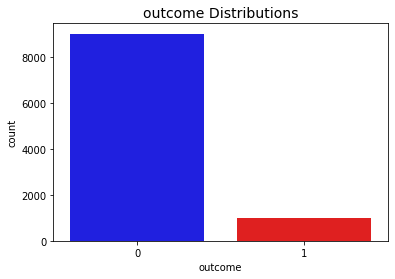

In [32]:
colors = ["blue", "red"]

sns.countplot('outcome', data=df_train, palette=colors)
plt.title('outcome Distributions', fontsize=14)

In [33]:
'''Since our response variable is highly skewed in the training 
dataframe, I'm creating a new balanced dataframe to work with'''

# shuffling the data before creating the subsample
df_train = df_train.sample(frac=1, random_state=123)

# create eqully sized ones and zeros dataframes
df_ones  = df_train.loc[df_train['outcome'] == 1]
df_zeros = df_train.loc[df_train['outcome'] == 0][:df_ones.shape[0]]

# concatinating them
df_ready = pd.concat([df_ones, df_zeros])

# Shuffle again
df_ready = df_ready.sample(frac=1, random_state=123)

# training dataset is ready
df_ready.head()


,age,cost_of_ad,device_Android,device_desktop,device_iPhone,device_laptop,device_other,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
9337,0.840909,0.116328,1.0,0.0,0.0,0.0,0.0,1.0,1,0.767031,1.0,0.0,0.409091,1
2514,1.000000,0.214531,1.0,0.0,0.0,0.0,0.0,1.0,1,0.757260,0.0,0.5,0.909091,0
8034,0.250000,0.227122,0.0,1.0,0.0,0.0,0.0,1.0,0,0.183289,0.0,0.0,0.136364,1
4566,0.613636,0.771483,0.0,0.0,1.0,0.0,0.0,0.0,1,0.343260,0.0,0.5,0.000000,0
5223,0.954545,0.293806,1.0,0.0,0.0,0.0,0.0,1.0,1,0.891023,0.0,0.0,0.590909,1


Distribution of the outcomes in the subsample dataset
1    0.5
0    0.5
Name: outcome, dtype: float64


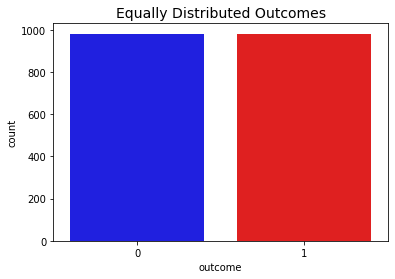

In [34]:
# looking at the ready balanced trainind dataframe
print('Distribution of the outcomes in the subsample dataset')
print(df_ready['outcome'].value_counts()/len(df_ready))

sns.countplot('outcome', data=df_ready, palette=colors)
plt.title('Equally Distributed Outcomes', fontsize=14)
plt.show()

Data is ready to work on

---------------

***Training***

In [35]:
# Trying 4 different clasiifiers to solve the problem
X = df_ready.drop('outcome', axis=1)
y = df_ready['outcome']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Turn the values into an array for feeding to the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Define the classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
}

# getting the training score for each classifier
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")



Classifiers:  LogisticRegression Has a training score of 73.0 % accuracy score
Classifiers:  SVC Has a training score of 76.0 % accuracy score


***Tuning***

In [36]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=log_reg_params, scoring='roc_auc', cv=5)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print(log_reg)

# Support Vector Classifier
svc_params = {'C': [0.25, 0.5, 0.7, 0.9, 1, 1.5, 2.0], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(estimator=SVC(), param_grid=svc_params, scoring='roc_auc', cv=5)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_
print(svc)


LogisticRegression(C=100)
SVC(C=0.25, kernel='poly')


***Evaluation***

*Getting the expected AUC for the test.csv values and plotting*

In [37]:
X = X_test
y = y_test
log_reg_pred_test = cross_val_predict(log_reg, X, y, cv=5, method="decision_function")
print('AUC for y_test using log_reg   : ', round(roc_auc_score(y, log_reg_pred_test), 4))
svc_pred_test = cross_val_predict(svc, X, y, cv=5, method="decision_function")
print('AUC for y_test using SVC       : ', round(roc_auc_score(y, svc_pred_test), 4))


AUC for y_test using log_reg   :  0.8343
AUC for y_test using SVC       :  0.8478


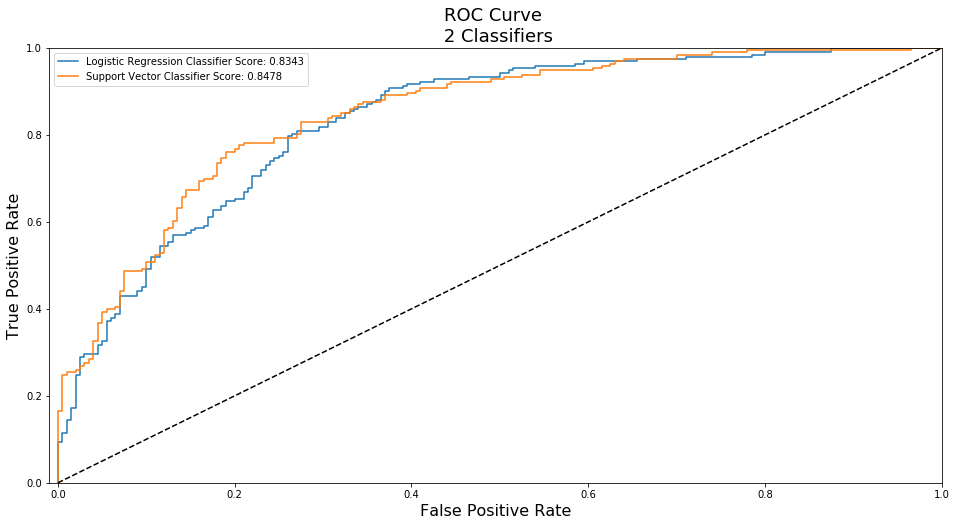

In [38]:
y = y_test
log_fpr, log_tpr, log_thresold = roc_curve(y, log_reg_pred_test)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y, svc_pred_test)

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n 2 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr,
             label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y, log_reg_pred_test)))
    plt.plot(svc_fpr, svc_tpr,
             label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, svc_pred_test)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr)
plt.show()


----

**Decision: Support Vector Classifier is chosen ==> expected AUC on the test.csv is higher; 0.8478.**

----

***Final Predictions on the test.csv file***

In [39]:
predictions_for_testCsv = svc.predict(df_test.values)
df_final_predictions = pd.DataFrame(data=predictions_for_testCsv, columns = ['predictions'])
print('First 5 rows of predictions on the test.csv file')
df_final_predictions.head()

First 5 rows of predictions on the test.csv file


,predictions
0,0
1,1
2,0
3,0
4,0
